In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from datetime import datetime
import numpy as np

bigfoot = pd.read_csv('./bfro_reports.csv')

I could not get the data to load properly from its URL because it is password-gated.  This was not an issue on the previous homework assignment.  I loaded it into jupyter, so that I could actually use it.  I know this isnt how we are supposed to do it, but I will try to figure it out later.

# Frequency of reports by state:
plots number of reports by state.  In the future, I would like to figure out how to format the plot so that all of the state names show up without being too crowded.

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 <a list of 10 Text xticklabel objects>)

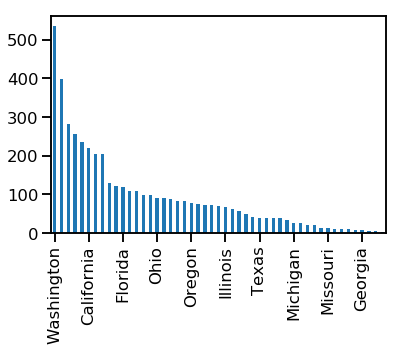

In [151]:
bigfoot.state.value_counts().plot(kind='bar')
plt.xticks(np.arange(0, 50, step=5))
plt.xticks(rotation=90, horizontalalignment='center')

## Cleaning data - removing rows with no date value:
Creates a new dataframe, df, that has removed all rows with null date values

In [112]:
df = pd.DataFrame(bigfoot)
df['date'].replace('', np.nan, inplace=True)
df.dropna(subset=['date'], inplace=True)

Creates a new column in the dataframe with the date values converted to datetime

In [236]:
df['date_parsed'] = pd.to_datetime(df['date'], format = "%Y/%m/%d")

In [271]:
counts_by_year = df['date_parsed'].dt.year.value_counts()
counts_by_month = df['date_parsed'].dt.month.value_counts()

# Frequency of reports by year
Takes the number of reports for each year and plots frequency on a graph

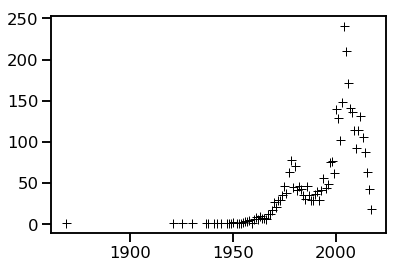

In [273]:
plt.plot(counts_by_year, "k+")

For the life of me I could not figure out how to make this show up properly as a line graph.  The lines connected horizontally instead of vertically, no clue why. But you can still see an interesting spike in bigfoot sightings around Y2K.

# Discussion
First of all, I did not end up getting to merge in an additional dataset. I did not have time to think through what dataset would be good to merge, and I did not find a suitable dataset online in the time alotted for this assignment.  

## Data Cleaning
I am proud of what I accomplished in under a week in terms of cleaning my data to make it more useful for analysis.  I learned how to parse the dates.  Considering what we have learned, it would have been impossible for me to get to all of the analysis in my project proposal, but I have learned a few useful skills that I can use to continue this work in the future.